In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline 
from datetime import datetime as dt

# In this Marketing campaign dataset I'm trying to find answers to questions like 
## Ads reach in our campaign
## Ads reach by marketing channels  
## Conversion rates by marketing channel 
## channels with subscribing channels percentages 
## our users ages
## # Retention Rates per every channel 



In [2]:
data=pd.read_csv('marketing.csv')

In [3]:
data.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


In [4]:
data.isnull().sum()

user_id                   0
date_served              16
marketing_channel        15
variant                   0
converted                15
language_displayed        0
language_preferred        0
age_group                 0
date_subscribed        8181
date_canceled          9460
subscribing_channel    8181
is_retained            8181
dtype: int64

In [5]:
data.shape

(10037, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
user_id                10037 non-null object
date_served            10021 non-null object
marketing_channel      10022 non-null object
variant                10037 non-null object
converted              10022 non-null object
language_displayed     10037 non-null object
language_preferred     10037 non-null object
age_group              10037 non-null object
date_subscribed        1856 non-null object
date_canceled          577 non-null object
subscribing_channel    1856 non-null object
is_retained            1856 non-null object
dtypes: object(12)
memory usage: 941.0+ KB


In [7]:
data.describe()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10037,10021,10022,10037,10022,10037,10037,10037,1856,577,1856,1856
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,1/15/18,House Ads,control,False,English,English,19-24 years,1/16/18,4/2/18,Instagram,True
freq,12,789,4733,5091,8946,9793,9275,1682,163,15,600,1279


In [8]:
data.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


In [9]:
data['converted']=data['converted'].astype('bool')

In [10]:
data['is_house_ads']=np.where(data['marketing_channel']=='House Ads',True,False)

In [11]:
data.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,is_house_ads
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True,True


In [13]:
data['date_served']=pd.to_datetime(data['date_served'])
data['date_subscribed']=pd.to_datetime(data['date_subscribed'])
data['date_canceled']=pd.to_datetime(data['date_canceled'])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 13 columns):
user_id                10037 non-null object
date_served            10021 non-null datetime64[ns]
marketing_channel      10022 non-null object
variant                10037 non-null object
converted              10037 non-null bool
language_displayed     10037 non-null object
language_preferred     10037 non-null object
age_group              10037 non-null object
date_subscribed        1856 non-null datetime64[ns]
date_canceled          577 non-null datetime64[ns]
subscribing_channel    1856 non-null object
is_retained            1856 non-null object
is_house_ads           10037 non-null bool
dtypes: bool(2), datetime64[ns](3), object(8)
memory usage: 882.2+ KB


In [15]:
data.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,is_house_ads
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,True
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,True
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,True
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,True
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,True


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 13 columns):
user_id                10037 non-null object
date_served            10021 non-null datetime64[ns]
marketing_channel      10022 non-null object
variant                10037 non-null object
converted              10037 non-null bool
language_displayed     10037 non-null object
language_preferred     10037 non-null object
age_group              10037 non-null object
date_subscribed        1856 non-null datetime64[ns]
date_canceled          577 non-null datetime64[ns]
subscribing_channel    1856 non-null object
is_retained            1856 non-null object
is_house_ads           10037 non-null bool
dtypes: bool(2), datetime64[ns](3), object(8)
memory usage: 882.2+ KB


In [17]:
data['is_retained']=data['is_retained'].astype('bool')


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 13 columns):
user_id                10037 non-null object
date_served            10021 non-null datetime64[ns]
marketing_channel      10022 non-null object
variant                10037 non-null object
converted              10037 non-null bool
language_displayed     10037 non-null object
language_preferred     10037 non-null object
age_group              10037 non-null object
date_subscribed        1856 non-null datetime64[ns]
date_canceled          577 non-null datetime64[ns]
subscribing_channel    1856 non-null object
is_retained            10037 non-null bool
is_house_ads           10037 non-null bool
dtypes: bool(3), datetime64[ns](3), object(7)
memory usage: 813.6+ KB


In [26]:
data['serve_day_of_month']=data['date_served'].dt.day

# Ads reach in our campaign


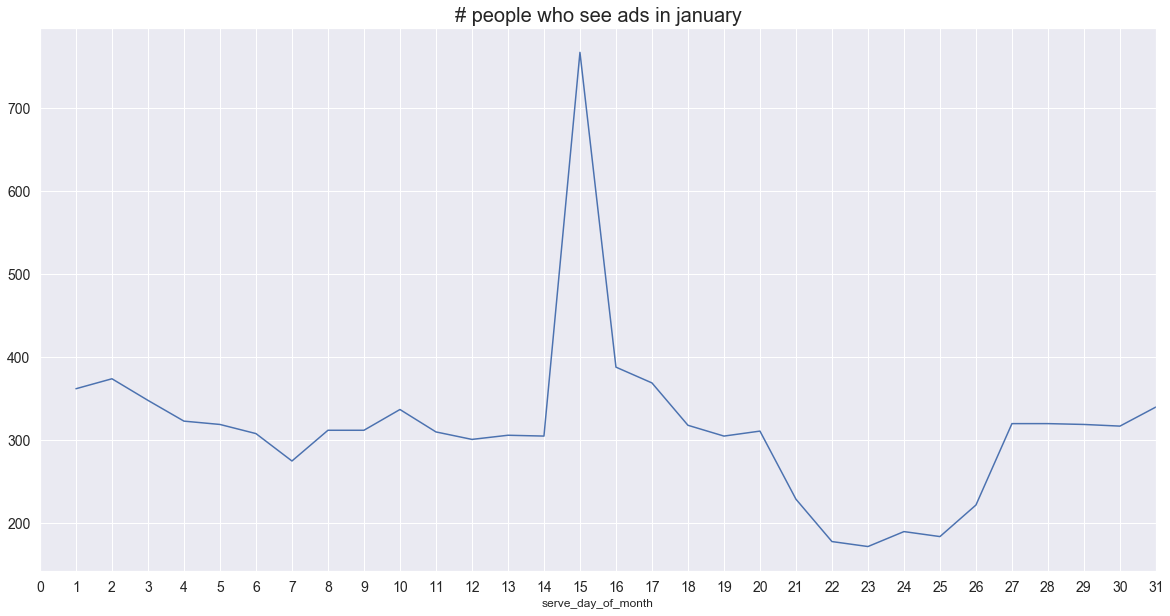

In [160]:
fig=plt.figure(figsize=(20,10))
data.groupby('serve_day_of_month')['user_id'].nunique().plot(kind='line')
plt.title('# people who see ads in january',fontsize=20)
plt.xticks(range(0,32),fontsize=14)
plt.yticks(fontsize=14)
plt.show()
fig.savefig("ads_reach.png", bbox_inches='tight')

In [31]:
data.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,is_house_ads,serve_day_of_month
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,True,1.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,True,1.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,True,1.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,True,1.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,True,1.0


In [32]:
data.marketing_channel.value_counts()

House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
Name: marketing_channel, dtype: int64

In [35]:
house_ads_channel=data[data['marketing_channel']=='House Ads']
instagram_channel=data[data['marketing_channel']=='Instagram']
face_book_channel=data[data['marketing_channel']=='Facebook']
push_channel=data[data['marketing_channel']=='Push']
email_channel=data[data['marketing_channel']=='Email']


# Ads reach by marketing channels  

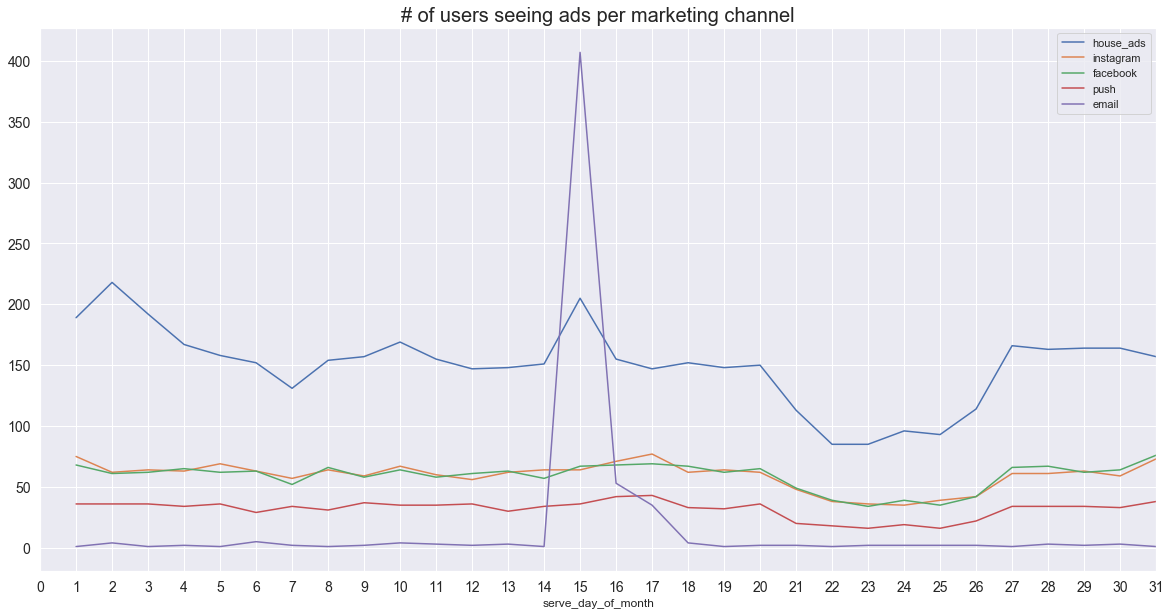

In [161]:
fig=plt.figure(figsize=(20,10))
house_ads_channel.groupby('serve_day_of_month')['user_id'].nunique().plot(kind='line',label='house_ads')
instagram_channel.groupby('serve_day_of_month')['user_id'].nunique().plot(kind='line',label='instagram')
face_book_channel.groupby('serve_day_of_month')['user_id'].nunique().plot(kind='line',label='facebook')
push_channel.groupby('serve_day_of_month')['user_id'].nunique().plot(kind='line',label='push')
email_channel.groupby('serve_day_of_month')['user_id'].nunique().plot(kind='line',label='email')
plt.title('# of users seeing ads per marketing channel',fontsize=20)
plt.xticks(range(0,32),fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.show()
fig.savefig("ads_reach_per_marketing_channel.png", bbox_inches='tight')

In [69]:
avg_cr=data[data['converted']==True]['user_id'].nunique()/data['user_id'].nunique()
avg_cr

0.14092215077301956

In [61]:
house_ads_cr=house_ads_channel[house_ads_channel['converted']==True]['user_id'].nunique()/house_ads_channel['user_id'].nunique()
house_ads_cr

0.0751008064516129

In [62]:
instagram_cr=instagram_channel[instagram_channel['converted']==True]['user_id'].nunique()/instagram_channel['user_id'].nunique()
instagram_cr

0.13333333333333333

In [63]:
facebook_cr=face_book_channel[face_book_channel['converted']==True]['user_id'].nunique()/face_book_channel['user_id'].nunique()

facebook_cr

0.12571103526734925

In [64]:
push_cr=push_channel[push_channel['converted']==True]['user_id'].nunique()/push_channel['user_id'].nunique()

push_cr

0.07921810699588477

In [65]:
email_cr=email_channel[email_channel['converted']==True]['user_id'].nunique()/email_channel['user_id'].nunique()
email_cr

0.33815551537070526

In [94]:
conversion_raaaates=[0.33815551537070526,0.0751008064516129,0.13333333333333333,0.12571103526734925,0.07921810699588477,0.14092215077301956]

In [3]:
#conversion_rates=pd.DataFrame(data=conversion_raaaates,columns=['email_cr','house_ads_cr','instagram_cr','facebook_cr','push_cr','average_conversion_of_all_channels'])
#conversion_rates.info()

In [ ]:
columns=['email_cr','house_ads_cr','instagram_cr','facebook_cr','push_cr','average_conversion_of_all_channels']

In [ ]:
{}

In [100]:
conversion_rates['email_cr']= [0.33815551537070526]
conversion_rates['house_ads_cr']= [0.0751008064516129]
conversion_rates['instagram_cr']=[ 0.13333333333333333]
conversion_rates['facebook_cr']=[ 0.12571103526734925]
conversion_rates['push_cr']= [0.07921810699588477]
conversion_rates['average_conversion_of_all_channels']= 0.14092215077301956

# Conversion rates by marketing channel 

In [154]:
conversion_rates

,email_cr,house_ads_cr,instagram_cr,facebook_cr,push_cr,average_conversion_of_all_channels
0,0.338156,0.075101,0.133333,0.125711,0.079218,0.140922


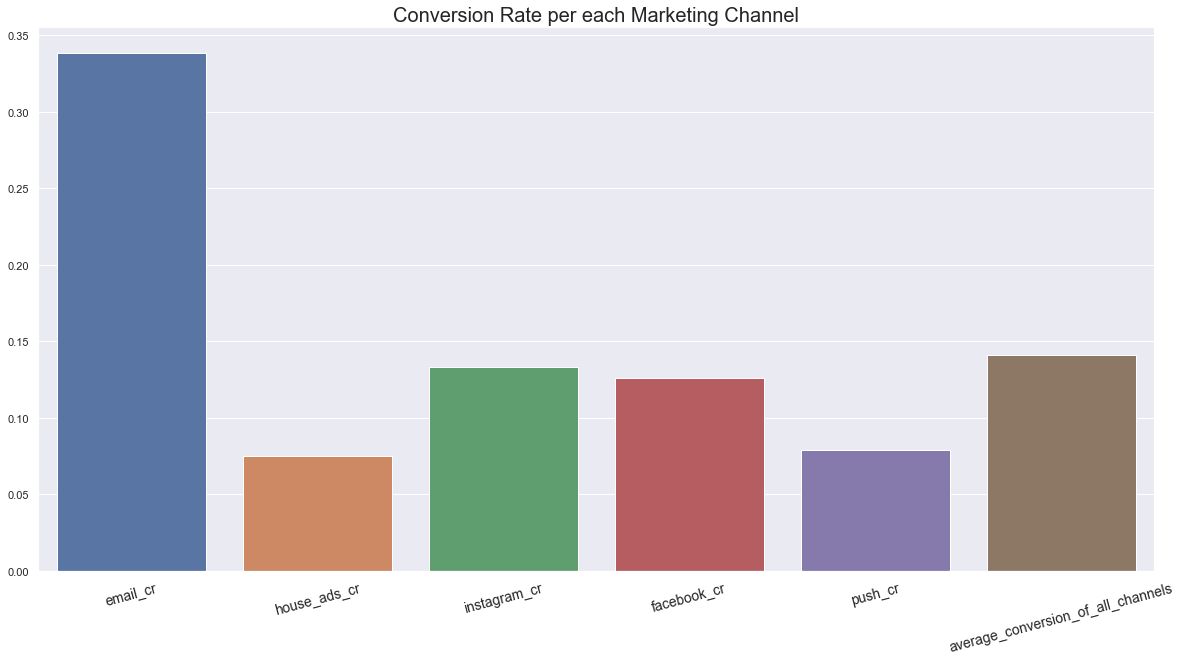

In [162]:
fig=plt.figure(figsize=(20,10))
sns.barplot(data=conversion_rates)
plt.xticks(rotation=15,fontsize=14)
plt.title('Conversion Rate per each Marketing Channel',fontsize=20)
plt.show()
fig.savefig("conversion_rate_per_marketing_channel.png", bbox_inches='tight')

In [112]:
data.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,is_house_ads,serve_day_of_month
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,True,1.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,True,1.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,True,1.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,True,1.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,True,1.0


In [113]:
data.isnull().sum()

user_id                   0
date_served              16
marketing_channel        15
variant                   0
converted                 0
language_displayed        0
language_preferred        0
age_group                 0
date_subscribed        8181
date_canceled          9460
subscribing_channel    8181
is_retained               0
is_house_ads              0
serve_day_of_month       16
dtype: int64

# channels with subscribing channels percentages 

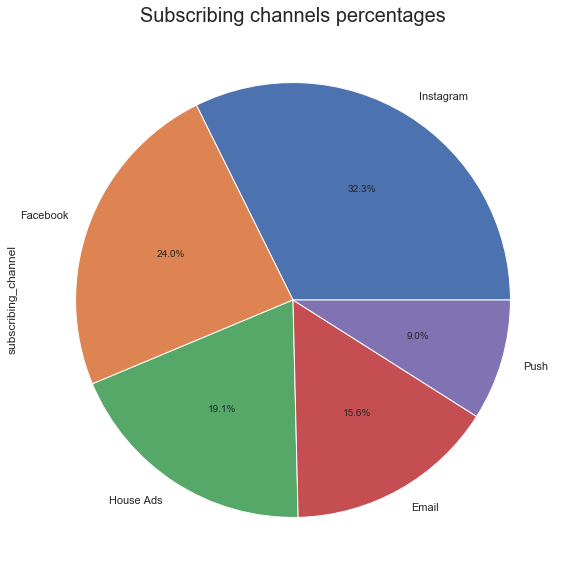

In [163]:
fig=plt.figure(figsize=(20,10))
plt.title('Subscribing channels percentages',fontsize=20)
data.subscribing_channel.value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%')
plt.show()
fig.savefig("percentage_of_subscribing_channels.png", bbox_inches='tight')

In [119]:
data.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,is_house_ads,serve_day_of_month
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,True,1.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,True,1.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,True,1.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,True,1.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,True,1.0


# Marketing channels percentages 

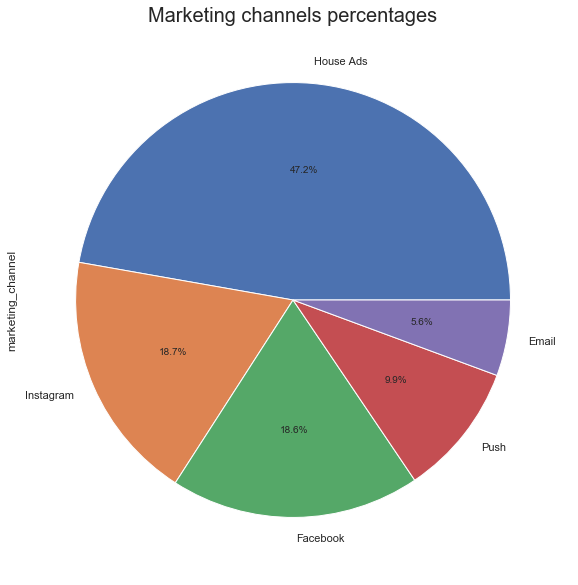

In [164]:
fig=plt.figure(figsize=(20,10))
plt.title('Marketing channels percentages',fontsize=20)
data.marketing_channel.value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%')
plt.show()
fig.savefig("marketing_channels_percentage.png", bbox_inches='tight')

In [121]:
data.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,is_house_ads,serve_day_of_month
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,True,1.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,True,1.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,True,1.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,True,1.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,True,1.0


# our users ages 

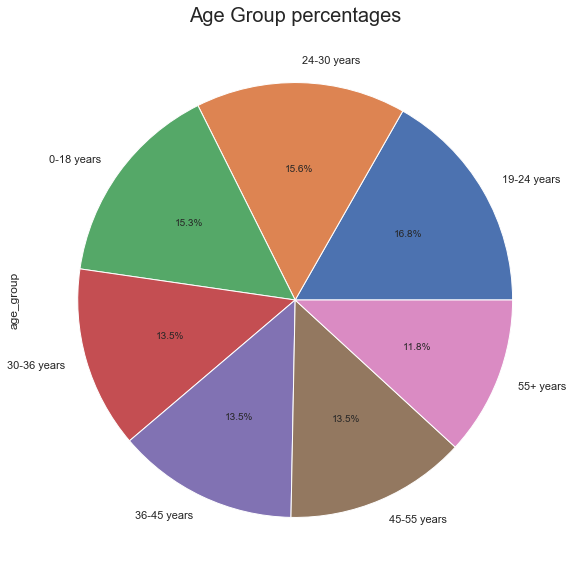

In [165]:
fig=plt.figure(figsize=(20,10))
plt.title('Age Group percentages',fontsize=20)
data.age_group.value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%')
plt.show()
fig.savefig("age_group_percentage.png", bbox_inches='tight')

In [123]:
avg_rr=data[data['is_retained']==True]['user_id'].nunique()/data['user_id'].nunique()
house_ads_rr=house_ads_channel[house_ads_channel['is_retained']==True]['user_id'].nunique()/house_ads_channel['user_id'].nunique()
instagram_rr=instagram_channel[instagram_channel['is_retained']==True]['user_id'].nunique()/instagram_channel['user_id'].nunique()
facebook_rr=face_book_channel[face_book_channel['is_retained']==True]['user_id'].nunique()/face_book_channel['user_id'].nunique()
push_rr=push_channel[push_channel['is_retained']==True]['user_id'].nunique()/push_channel['user_id'].nunique()
email_rr=email_channel[email_channel['is_retained']==True]['user_id'].nunique()/email_channel['user_id'].nunique()

In [124]:
avg_rr

0.9532083732384731

In [125]:
house_ads_rr

0.9478326612903226

0.9471264367816092

In [127]:
facebook_rr

0.9482366325369739

In [128]:
push_rr

0.9639917695473251

In [129]:
email_rr

0.9077757685352622

In [130]:
Retention_rates=pd.DataFrame()

In [140]:
Retention_rates['avg_rr']=0.9532083732384731

In [141]:
Retention_rates['house_ads_rr']=0.9478326612903226
Retention_rates['instagram_rr']=0.9471264367816092
Retention_rates['facebook_rr']=0.9482366325369739
Retention_rates['push_rr']=0.9639917695473251
Retention_rates['email_rr']=0.9077757685352622


In [1]:
#Retention_rates=pd.DataFrame(data=[0.9532083732384731,0.9478326612903226,0.9471264367816092,0.9482366325369739,0.9639917695473251,0.9077757685352622],columns=['avg_rr','house_ads_rr','instagram_rr','facebook_rr','push_rr','email_rr'])

In [145]:
Retention_rates=Retention_rates.iloc[:1,1:]

# Retention Rates per every channel 

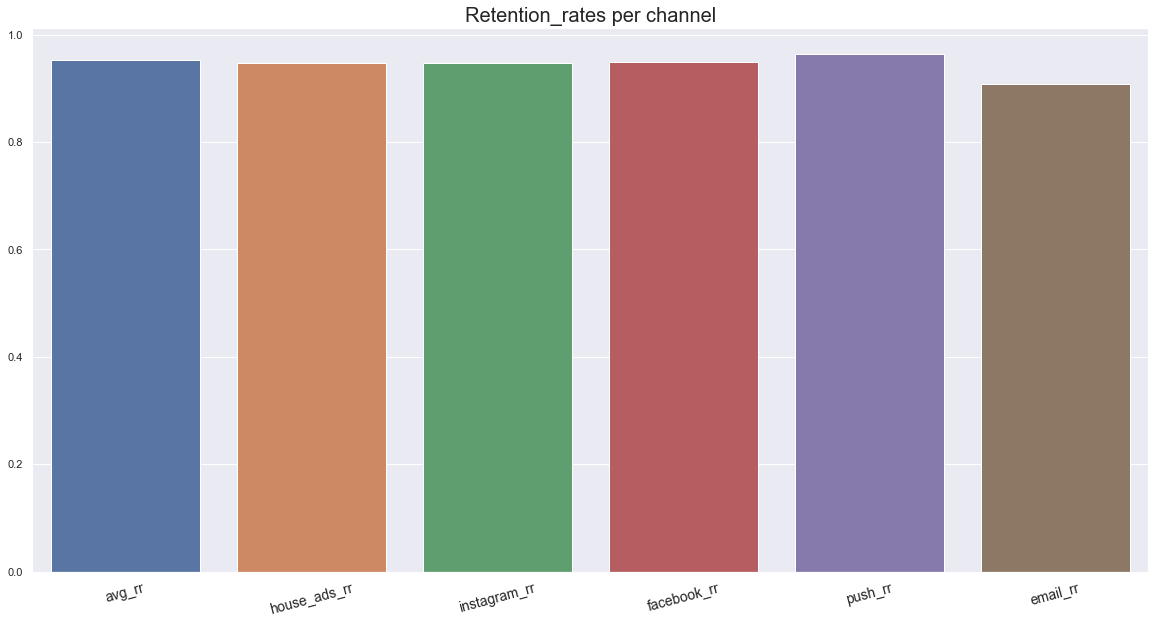

In [166]:
fig=plt.figure(figsize=(20,10))
sns.barplot(data=Retention_rates)
plt.xticks(rotation=15,fontsize=14)
plt.title('Retention_rates per channel',fontsize=20)
plt.show()
fig.savefig("retention_rates_per_channel.png", bbox_inches='tight')